**Demo for `teneva.sample_func`**

---

This module contains function for sampling from the functional TT-tensor (i.e., the tensor of interpolation coeeficients).

## Loading and importing modules

In [1]:
import numpy as np
import teneva
from time import perf_counter as tpc
np.random.seed(42)

## Function `sample_func`

Sample random points according to given functional probability TT-tensor.

In [16]:
Y = np.array([            # We generate 2D tensor for demo
    [0.1, 0.2, 0.3],
    [0. , 0. , 0. ],
    [0.2, 0.2, 0. ],
    [0. , 0. , 0. ],
])
Y = teneva.svd(Y)         # We compute its TT-representation
print(teneva.sum(Y))      # We print the sum of tensor elements

A = teneva.func_int(Y)    # We build TT-tensor of interpolation coefficients
x = teneva.sample_func(A) # And now we generate the sample
print(x)

1.0000000000000002
[ 0.98746625 -0.6478832 ]


And now let check this function for big random TT-tensor:

In [17]:
# 5-dim random TT-tensor with TT-rank 5:
Y = teneva.rand([4]*5, 5)

# Compute the square of Y:
Y = teneva.mul(Y, Y)

# Normalize the tensor:
p = teneva.sum(Y)
Y = teneva.mul(Y, 1./p)

# Print the resulting TT-tensor:
teneva.show(Y)

# Build TT-tensor of interpolation coefficients:
A = teneva.func_int(Y)

# Generate the sample:

x = teneva.sample_func(A)
print('\n--- Result:', x)

TT-tensor     5D : |4|  |4|  |4|  |4|  |4|
<rank>  =   25.0 :   \25/ \25/ \25/ \25/

--- Result: [-0.42998243  0.53969243  0.27790762 -0.50048467 -0.63095617]


We can also check the generated distribution (note that matplotlib is used below):

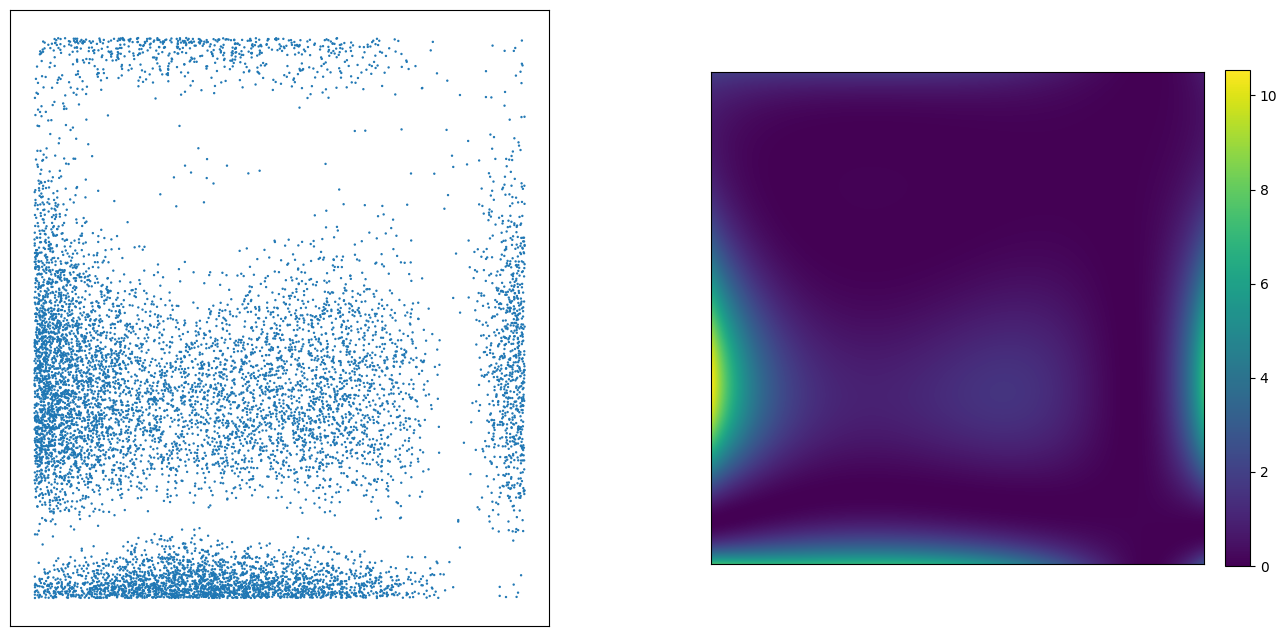

In [18]:
import matplotlib.pyplot as plt

samples = int(1.E+4)

A = teneva.rand([4]*2, 2)

X = np.array([teneva.sample_func(A) for _ in range(samples)])

N = 512
X_m = np.linspace(-1, 1, N)
x, y = np.meshgrid(X_m, X_m)
x = x.reshape(-1)
y = y.reshape(-1)
y = teneva.func_get(np.array([x, y]).T, A, -1, 1)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
plt.subplots_adjust(wspace=0.3)
im = ax1.scatter(X[:, 0], X[:, 1], s=[.5]*samples)
im = ax2.imshow(y.reshape(N, -1)**2, origin='lower')
plt.colorbar(im, fraction=0.046, pad=0.04)
ax1.set_xticks([])
ax1.set_yticks([])
ax2.set_xticks([])
ax2.set_yticks([])
plt.show()

Sample random multi-indices according to given probability TT-tensor (squared tensor is used).

In [5]:
Y = np.array([       # We generate 2D tensor for demo
    [0.1, 0.2, 0.3],
    [0. , 0. , 0. ],
    [0.2, 0.2, 0. ],
    [0. , 0. , 0. ],
])
Y = teneva.svd(Y)    # We compute its TT-representation
print(teneva.sum(Y)) # We print the sum of tensor elements

1.0000000000000002


In [6]:
m = 3 # Number of requested samples
I = teneva.sample_square(Y, m)

for i in I:
    print(i, teneva.get(Y, i))

[0 1] 0.19999999999999993
[0 0] 0.1
[2 0] 0.20000000000000012


We may also generate multi-indices with repeats:

In [7]:
m = 10
I = teneva.sample_square(Y, m, unique=False)
for i in I:
    print(i, teneva.get(Y, i))

[0 2] 0.30000000000000004
[0 1] 0.19999999999999993
[0 1] 0.19999999999999993
[2 1] 0.19999999999999998
[0 2] 0.30000000000000004
[0 2] 0.30000000000000004
[0 2] 0.30000000000000004
[2 1] 0.19999999999999998
[0 2] 0.30000000000000004
[2 1] 0.19999999999999998


And now let check this function for big random TT-tensor:

In [8]:
# 5-dim random TT-tensor with TT-rank 5:
Y = teneva.rand([4]*5, 5)

# Compute the square of Y:
Y = teneva.mul(Y, Y)

# Normalize the tensor:
p = teneva.sum(Y)
Y = teneva.mul(Y, 1./p)

# Print the resulting TT-tensor:
teneva.show(Y)

I = teneva.sample_square(Y, m=10)

print('\n--- Result:')
for i in I:
    print(i, teneva.get(Y, i))

TT-tensor     5D : |4|  |4|  |4|  |4|  |4|
<rank>  =   25.0 :   \25/ \25/ \25/ \25/

--- Result:
[1 0 1 2 2] 0.006794672157333136
[1 1 0 1 1] 0.004450109674681529
[2 0 2 0 1] 0.007509342017359113
[1 0 2 0 1] 0.003448569920689505
[2 1 1 0 0] 0.0022855464248411166
[3 3 1 0 0] 0.002569138931693821
[0 1 1 2 0] 0.004202312004487534
[1 2 2 1 3] 0.005067429232471865
[0 2 3 0 2] 0.006373841841063713
[0 1 3 1 3] 0.00399751823255496


Build LHS samples (indices) for the tensor.

In [9]:
d = 3           # Dimension of the tensor/grid
n = [5] * d     # Shape of the tensor/grid
m = 8           # Number of samples

I = teneva.sample_lhs(n, m)

print(I)

[[2 3 4]
 [0 1 3]
 [4 2 0]
 [1 4 1]
 [3 4 2]
 [1 0 2]
 [3 2 1]
 [4 1 3]]


---